In [45]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

import neurolib.dashboard.data as data
from neurolib.models.aln import ALNModel
import neurolib.dashboard.layout as layout
import neurolib.dashboard.functions as functions


# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
readpath = os.getcwd().split(os.sep + 'data_2')[0]

with open(readpath + os.sep + 'bi.pickle','rb') as file:
    load_array= pickle.load(file)
ext_exc = load_array[0]
ext_inh = load_array[1]

cmap = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors()
exc_red = cmap(3)
inh_blue=cmap(0)
green = cmap(2)

aln = ALNModel()
data.set_parameters(aln)
state_vars = aln.state_vars

facecolor_ = '#EAEAEA'
facecolor_ = 'white'

folder = str(os.getcwd().split('data_2')[1])[1:]

In [47]:
ind0 = 20
dur = 500.

data.set_parameters(aln)

aln.params.ext_exc_current = ext_exc[ind0] * 5.
aln.params.ext_inh_current = ext_inh[ind0] * 5.
        
maxI = 3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_1 = aln.getZeroTarget()
target_1[:,0,:] = aln.rates_exc[0,-1] 
target_1[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)
        
maxI = -3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_3 = aln.getZeroTarget()
target_3[:,0,:] = aln.rates_exc[0,-1] 
target_3[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)

aln.params.ext_exc_current = ext_exc[50] * 5.
aln.params.ext_inh_current = ext_inh[50] * 5.
        
maxI = 3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_1b = aln.getZeroTarget()
target_1b[:,0,:] = aln.rates_exc[0,-1] 
target_1b[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)
        
maxI = -3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_3b = aln.getZeroTarget()
target_3b[:,0,:] = aln.rates_exc[0,-1] 
target_3b[:,1,:] = aln.rates_inh[0,-1]

In [48]:
def readcase(readpath, i):

    with open(readpath,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0][i]
    bestState_ = load_array[1][i]
    cost_ = load_array[2][i]
    costnode_ = load_array[3][i]
    weights_ = load_array[4][i]
        
    return bestControl_, bestState_, costnode_, weights_

In [49]:
savepath = os.path.join(os.getcwd().split('neurolib')[0], 'writing' + os.sep + 'paper1' + os.sep 
                        + 'Frontiers' + os.sep + 'images')
cols = [r'down $\rightarrow$ up, $L^1$, point a', r'down $\rightarrow$ up, $L^1$, point b',
        r'down $\rightarrow$ up, $L^2$, point a', r'down $\rightarrow$ up, $L^2$, point b',
        r'up $\rightarrow$ down, $L^1$, point a', r'up $\rightarrow$ down, $L^1$, point b',
        r'up $\rightarrow$ down, $L^2$, point a', r'up $\rightarrow$ down, $L^2$, point b'
       ] 

In [50]:
def plot_control_current(model, control_array, state_array, weight_array,
                         target_, title, costnode_array, y_lim, y_ticks, x_ticks,
                         path_=savepath, filename_=''):
    
    dt = model.params.dt
    control_factor = model.params.C/1000.
    output_vars = model.output_vars
    
    n_subfigs = len(control_array)
    columns = len(control_array[0])
    rows = 2
    
    fig = plt.figure(figsize=(columns*5, n_subfigs*5), constrained_layout=True)
    subfigs = fig.subfigures(n_subfigs, 1)
    
    linewidth_ = 3    
    fontsize_ = 18
    
    #fig.text(0., 1., 'A', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    #fig.text(0., 0.666, 'B', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    #fig.text(0., 0.333, 'C', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    #fig.text(0., 0.25, 'D', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    
    props = dict(boxstyle='round', facecolor='grey', alpha=0.2)

    for i in range(n_subfigs):
            
        ax = subfigs[i].subplots(rows, columns)
        
        ##################### go through all controls in control array 
        
        for j in range(columns):
                        
            control_ = control_array[i][j]
            state_ = state_array[i][j]
            costnode_ = costnode_array[i][j]
            dur = (control_.shape[2] - 201.) * dt
            T = control_.shape[2] - 200
            weight = weight_array[i][j]
            
            time_ = np.arange(0., round(dur + dt, 1), dt)
            
            if 'Wmax' in filename_:
                ax[0,j].set_title('$T = ${:.1f}'.format(dur) + ' ms, ' + r'$W_1 = ${:.2f}'.format(weight),
                                       fontsize=fontsize_)
            else:
                ax[0,j].set_title('$T = ${:.1f}'.format(dur) + ' ms',
                                       fontsize=fontsize_)
            
            ax[0,j].plot(time_, target_[0,0,:T], '--', linewidth = 3, color=exc_red)
            ax[0,j].plot(time_, target_[0,1,:T], '--', linewidth = 3, color=inh_blue)
            
            ax[0,j].plot(time_, state_[0,0,100:-100], linewidth=linewidth_, color=exc_red)
            ax[0,j].plot(time_, state_[0,1,100:-100], linewidth=linewidth_, color=inh_blue)                     
            ax[1,j].plot(time_, control_[0,0,100:-100] * control_factor, linewidth=linewidth_, color=exc_red)
            ax[1,j].plot(time_, control_[0,1,100:-100] * control_factor, linewidth=linewidth_, color=inh_blue)                
                
            ax[0,j].axvspan( dur - 20., dur+1., facecolor='grey', alpha=0.2, zorder=-1, hatch='///', edgecolor = 'grey')

            ax[0,j].set_xticks([])
            ax[0,j].get_xaxis().set_visible(False)
            ax[1,j].set_xlabel('t [ms]', fontsize=fontsize_) 
            ax[0,j].set_yticks(np.arange(0., 105., 25.))
            if j != 0:
                ax[0,j].set_yticks([])
            ax[0,j].set_ylim([-5., 120.])
            
            ax[1,j].set_yticks(y_ticks[i][j])
            ax[1,j].set_ylim(y_lim[i][j])
            ax[1,j].set_xticks(x_ticks[i][j])
            
            
            if np.abs(costnode_[2][0][0]) < 1e-12:
                costnode_[2][0][0] = 0.
            if np.abs(costnode_[2][0][1]) < 1e-12:
                costnode_[2][0][1] = 0.
            
            textstr = str( r'$F_P = $' + '{:#.4g}'.format(costnode_[0][0][0])
                        + '\n' + r'$F_{1,E} =$' + '{:#.4g}'.format(costnode_[2][0][0]) 
                        + '\n' + r'$F_{1,I} =$' + '{:#.4g}'.format(costnode_[2][0][1])
                         )
            
            ax[0,j].text(0.05, 0.9, textstr, transform=ax[0,j].transAxes, fontsize=fontsize_,
            verticalalignment='top', horizontalalignment='left', bbox=props)

            for l in range(rows):
                ax[l,j].tick_params(axis='x', labelsize=fontsize_)
                ax[l,j].tick_params(axis='y', labelsize=fontsize_)
                ax[l,j].set_xlim([0., dur])
                ax[l,j].grid(False)

            ax[0,0].set_ylabel('Rates [Hz]', fontsize=fontsize_)      
            ax[1,0].set_ylabel('Control [nA]', fontsize=fontsize_)  

    fig.suptitle(title, fontsize=fontsize_, y=1.03)
        
    plt.savefig(os.path.join(path_, filename_), bbox_inches='tight', facecolor=fig.get_facecolor(),
                edgecolor='none', dpi=300)
    plt.savefig( filename_, bbox_inches='tight', facecolor=fig.get_facecolor(),
                edgecolor='none', dpi=300)
    
    print(filename_)

In [14]:
i = 20
target_array = target_1

In [43]:
readpath = str(folder + '.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,0)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j, costnode_[j][2][0][:2])
        if type(weights_[j]) == type(None):
            weights_[j] = [1., 0., 1.]

0 [1.25115182e-15 3.33115700e+00]
100 [1.25115182e-15 3.33115700e+00]
200 [1.25115181e-15 3.33115700e+00]
300 [1.25115172e-15 3.33115700e+00]
400 [1.25115162e-15 3.33115700e+00]
500 [9.41580065e-07 3.33115700e+00]
600 [9.41580065e-07 3.33115700e+00]
700 [9.41580065e-07 3.33115793e+00]
800 [9.41580065e-07 3.33115793e+00]
900 [9.41580065e-07 3.33115964e+00]
1000 [9.41580065e-07 3.33116108e+00]
1100 [9.41580064e-07 3.33116320e+00]
1200 [9.41580063e-07 3.33116628e+00]
1300 [9.41580062e-07 3.33117038e+00]
1400 [9.41580059e-07 3.33117675e+00]
1500 [9.41580055e-07 3.33118570e+00]
1600 [9.41580049e-07 3.33119865e+00]
1700 [9.58835691e-08 3.33121693e+00]
1800 [9.58801600e-08 3.33123449e+00]
1900 [9.58410793e-08 3.33126071e+00]
2000 [9.54791955e-08 3.33130171e+00]
2100 [9.19698832e-08 3.33134879e+00]
2200 [8.81674003e-08 3.33136408e+00]
2300 [8.77923470e-08 3.33150063e+00]
2400 [8.77521388e-08 3.33159733e+00]
2500 [8.77469187e-08 3.33177446e+00]
2600 [8.77460540e-08 3.33211015e+00]
2700 [8.77457

1_i_20.jpg


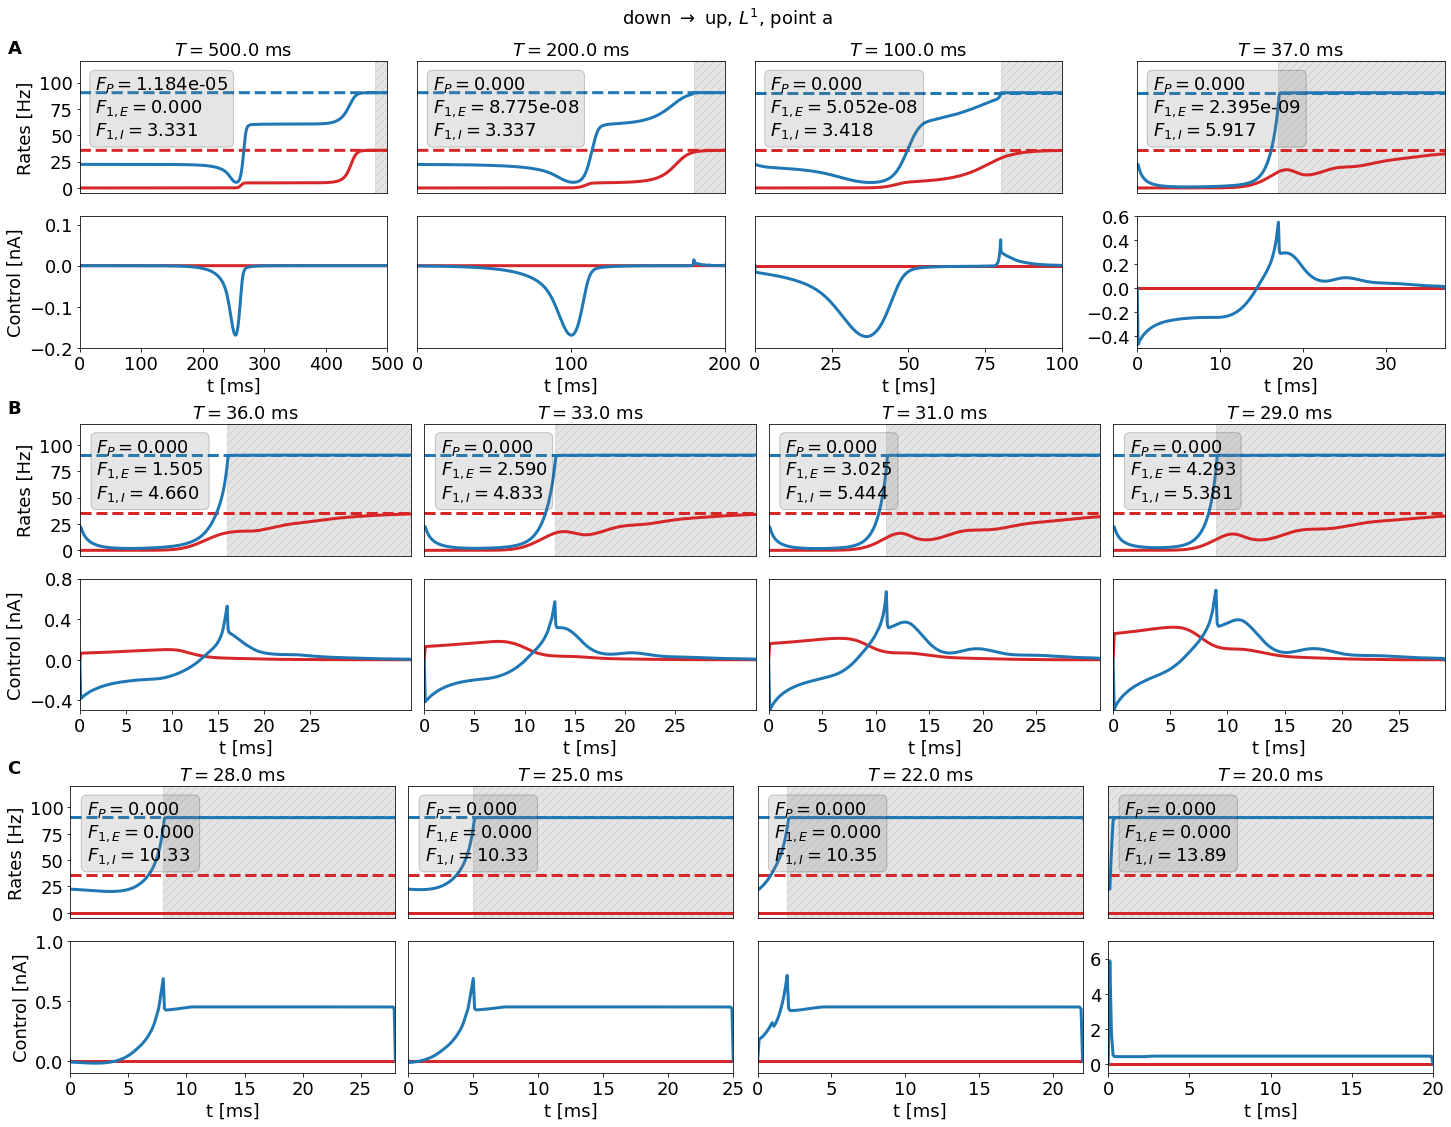

In [44]:
index_ = [ [0, 3000, 4000, 4630],
          [4640, 4670, 4690, 4710],
          [4720, 4750, 4780, 4800] ]

y_lim = [ [[-0.2, 0.12], [-0.2, 0.12], [-0.2, 0.12], [-0.5, 0.6] ],
         [ [-0.5, 0.8], [-0.5, 0.8], [-0.5, 0.8], [-0.5, 0.8] ],
          [[-.1, 1.], [-.1, 1.], [-.1, 1.], [-.5, 7.] ]
        ]
y_ticks = [ [np.arange(-0.2,0.11,0.1), [], [], np.arange(-0.4,0.61,0.2) ],
           [np.arange(-0.4,0.81,0.4), [], [], [] ],
            [[0., 0.5, 1.], [], [], np.arange(0,8,2)],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 101., 25.),
               np.arange(0., 101., 10.), np.arange(0., 200., 20.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)],
           [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
               [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
               [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
               [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                 [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '.jpg')
plt.show()

In [16]:
readpath = str(folder + '_Wmax.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,0)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2810
2820
2830
2840
2850
2860
2870
2880
2890
2900
2910
2920
2930
2940
2950
2960
2970
2980
2990
3000
3010
3020
3030
3040
3050
3060
3070
3080
3090
3100
3110
3120
3130
3140
3150
3160
3170
3180
3190
3200
3210
3220
3230
3240
3250
3260
3270
3280
3290
3300
3310
3320
3330
3340
3350
3360
3370
3380
3390
3400
3410
3420
3430
3440
3450
3460
3470
3480
3490
3500
3510
3520
3530
3540
3550
3560
3570
3580
3590
3600
3610
3620
3630
3640
3650
3660
3670
3680
3690
3700
3710
3720
3730
3740
3750
3760
3770
3780
3790
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
38

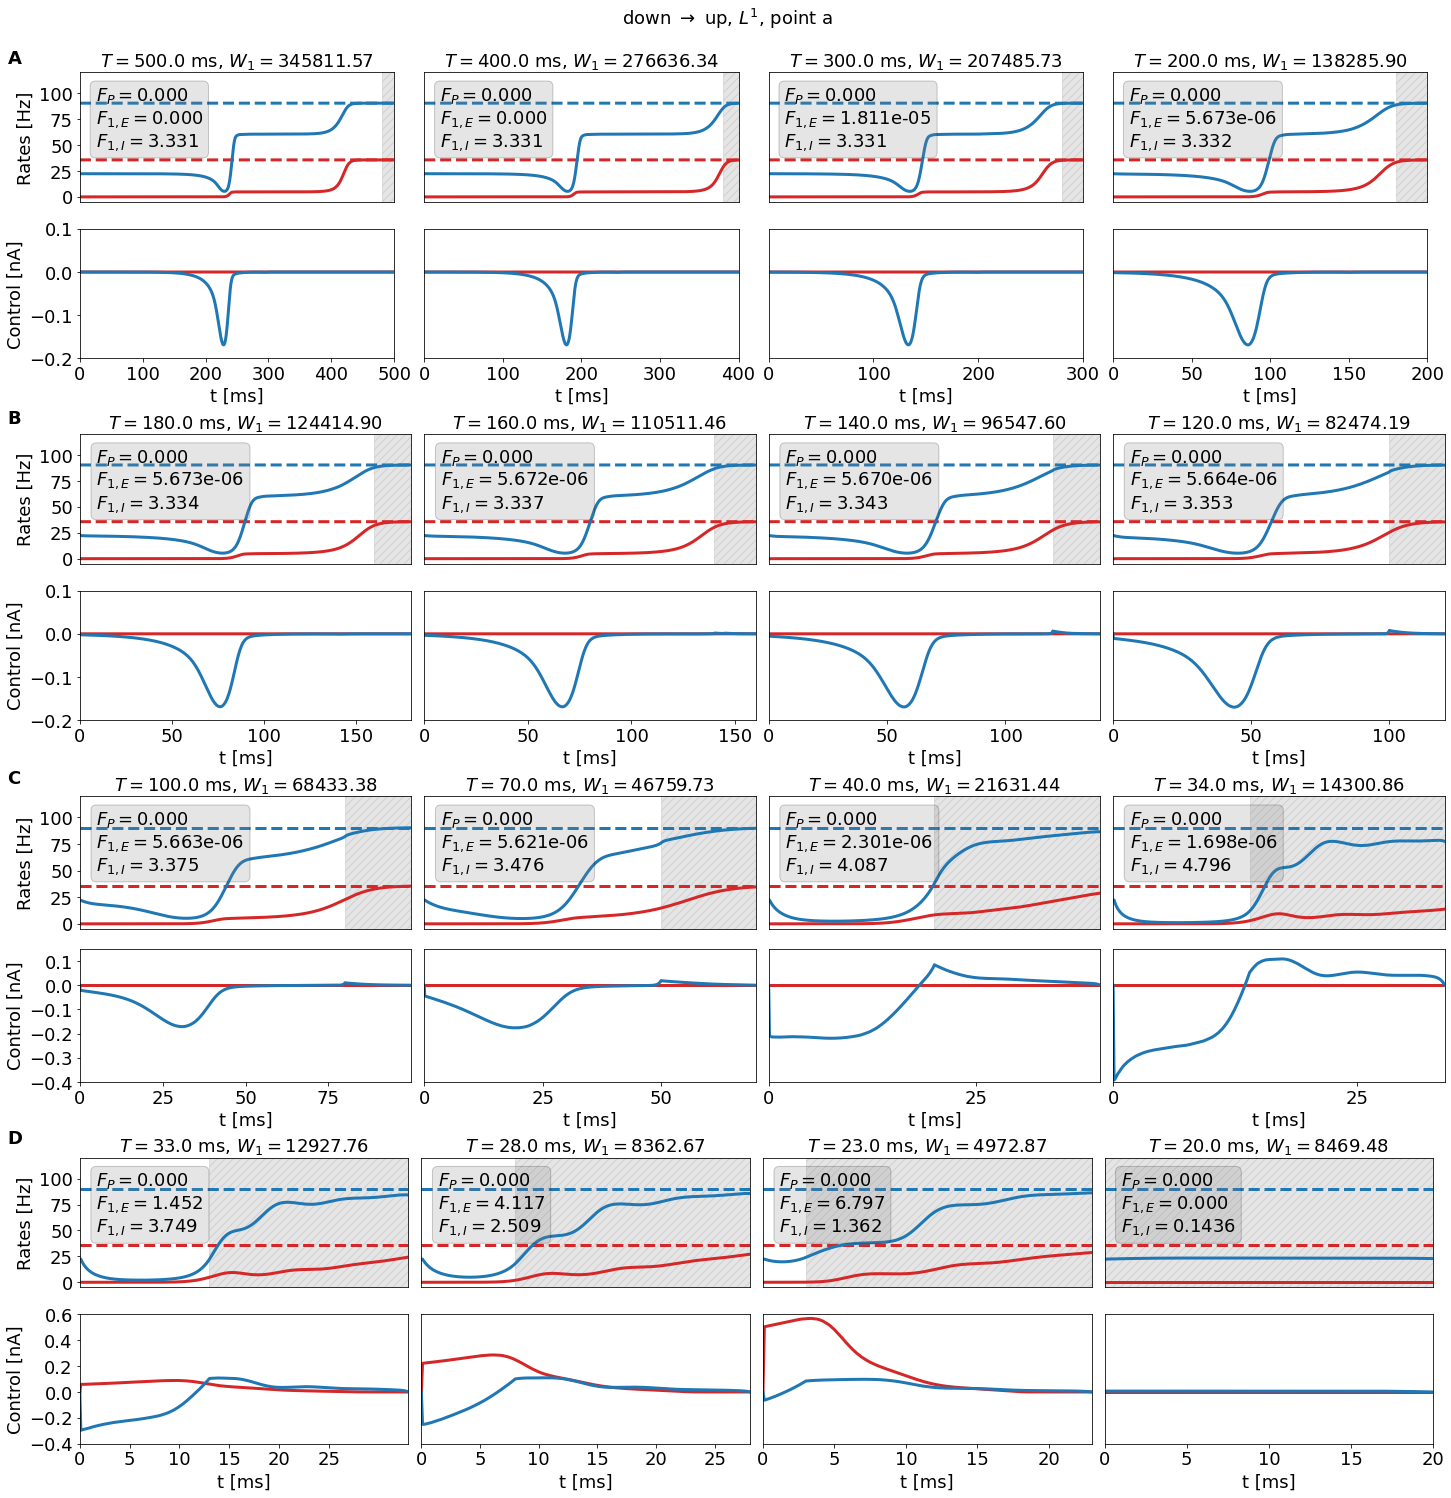

In [21]:
index_ = [ [0, 1000, 2000, 3000], 
          [3200, 3400, 3600, 3800],
          [4000, 4300, 4600, 4660],
          [4670, 4720, 4770, 4800] ]

y_lim = [ [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.4, 0.15], [-0.4, 0.15], [-0.4, 0.15], [-0.4, 0.15] ],
          [[-0.4, 0.6], [-0.4, 0.6], [-0.4, 0.6], [-0.4, 0.6] ]
        ]
y_ticks = [ [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [np.arange(-0.4, 0.11, 0.1), [], [], [] ],
            [[-0.4, -0.2, 0., 0.2, 0.4, 0.6], [], [], [] ],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '_Wmax.jpg')
plt.show()

In [60]:
i = 50
target_array = target_1b

In [61]:
readpath = str(folder + '.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,1)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3810
3820
3830
3840
3850
3860
3870
3880
3890
3900
3910
3920
3930
3940
3950
3960
3970
3980
3990
4000
4010
4020
4030
4040
4050
4060
4070
4080
4090
4100
4110
4120
4130
4140
4150
4160
4170
4180
4190
4200
4210
4220
4230
4240
4250
4260
4270
4280
4290
4300
4310
4320
4330
4340
4350
4360
4370
4380
4390
4400
4410
4420
4430
4440
4450
4460
4470
4480
4490
4500
4510
4520
4530
4540
4550
4560
4570
4580
4590
4600
4610
4620
4630
4640
4650
4660
4670
4680
4690
4700
4710
4720
4730
4740
4750
4760
4770
4780
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800


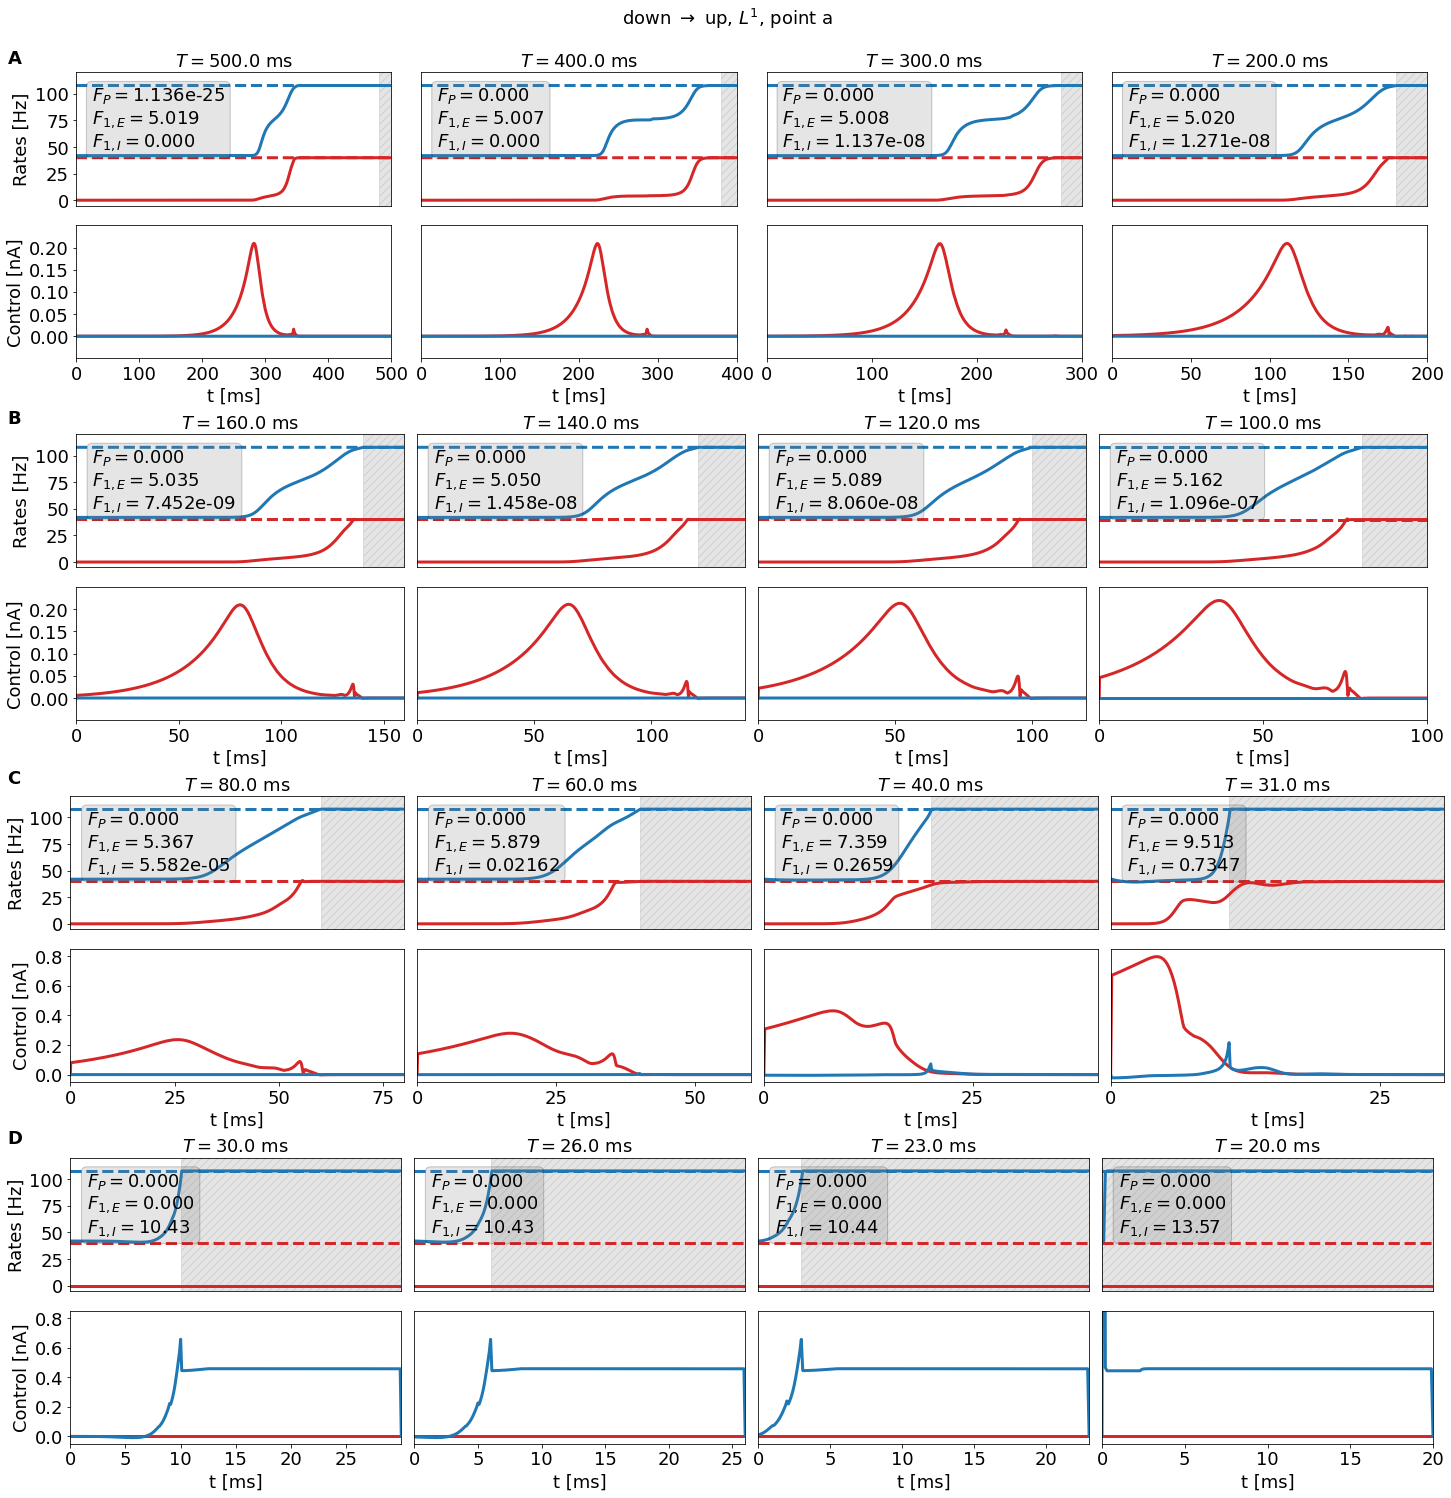

In [62]:
index_ = [ [0, 1000, 2000, 3000], 
          [3400, 3600, 3800, 4000],
          [4200, 4400, 4600, 4690],
          [4700, 4740, 4770, 4800] ]

y_lim = [ [[-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25] ],
          [[-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25] ],
          [[-0.05, 0.85], [-0.05, 0.85], [-0.05, 0.85], [-0.05, 0.85] ],
          [[-0.05, 0.85], [-0.05, 0.85], [-0.05, 0.85], [-0.05, 0.85] ]
        ]
y_ticks = [ [np.arange(-0.0,0.21,0.05), [], [], [] ],
            [np.arange(-0.0,0.21,0.05), [], [], [] ],
            [np.arange(-0.0,0.81,0.2), [], [], [] ],
            [np.arange(-0.0,0.81,0.2), [], [], []],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]

plot_control_current(aln, cntrl_array, state_array, weight_array, target_1b, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '.jpg')
plt.show()

In [37]:
readpath = str(folder + '_Wmax.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,1)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2810
2820
2830
2840
2850
2860
2870
2880
2890
2900
2910
2920
2930
2940
2950
2960
2970
2980
2990
3000
3010
3020
3030
3040
3050
3060
3070
3080
3090
3100
3110
3120
3130
3140
3150
3160
3170
3180
3190
3200
3210
3220
3230
3240
3250
3260
3270
3280
3290
3300
3310
3320
3330
3340
3350
3360
3370
3380
3390
3400
3410
3420
3430
3440
3450
3460
3470
3480
3490
3500
3510
3520
3530
3540
3550
3560
3570
3580
3590
3600
3610
3620
3630
3640
3650
3660
3670
3680
3690
3700
3710
3720
3730
3740
3750
3760
3770
3780
3790
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
38

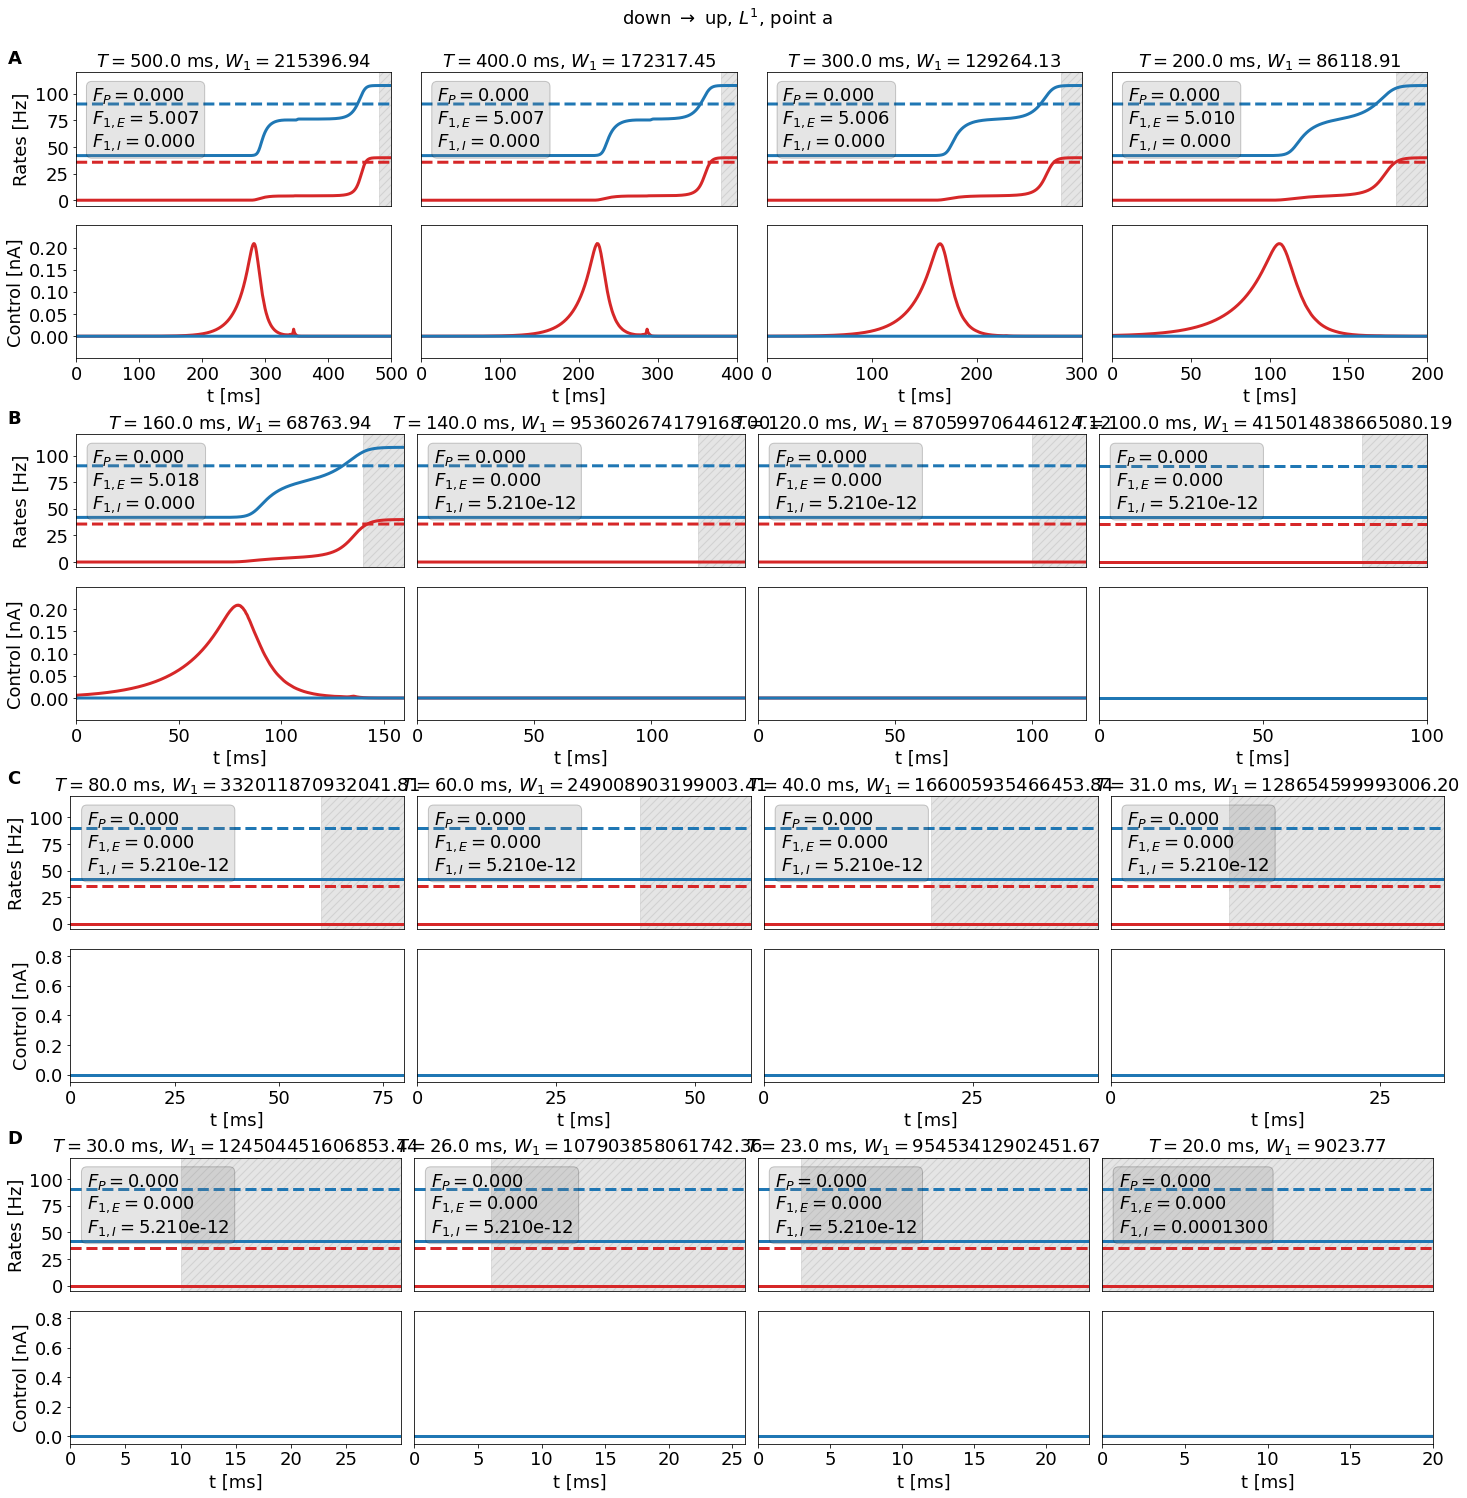

In [38]:
index_ = [ [0, 1000, 2000, 3000], 
          [3400, 3600, 3800, 4000],
          [4200, 4400, 4600, 4690],
          [4700, 4740, 4770, 4800] ]

y_lim = [ [[-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25] ],
          [[-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25], [-0.05, 0.25] ],
          [[-0.05, 0.85], [-0.05, 0.85], [-0.05, 0.85], [-0.05, 0.85] ],
          [[-0.05, 0.85], [-0.05, 0.85], [-0.05, 0.85], [-0.05, 0.85] ]
        ]
y_ticks = [ [np.arange(-0.0,0.21,0.05), [], [], [] ],
            [np.arange(-0.0,0.21,0.05), [], [], [] ],
            [np.arange(-0.0,0.81,0.2), [], [], [] ],
            [np.arange(-0.0,0.81,0.2), [], [], []],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][2], weights_[index_[0][1]][2], weights_[index_[0][2]][2],
                 weights_[index_[0][3]][2] ],
                [weights_[index_[1][0]][2], weights_[index_[1][1]][2], weights_[index_[1][2]][2],
                 weights_[index_[1][3]][2] ],
                [weights_[index_[2][0]][2], weights_[index_[2][1]][2], weights_[index_[2][2]][2],
                 weights_[index_[2][3]][2] ],
                [weights_[index_[3][0]][2], weights_[index_[3][1]][2], weights_[index_[3][2]][2],
                 weights_[index_[3][3]][2] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1b, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '_Wmax.jpg')
plt.show()